<a href="https://colab.research.google.com/github/Ananda948/Edu-Data-Mining/blob/main/edu_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import warnings
import time
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, precision_score

# Pre-Processing Dataset

## Load & Read Dataset

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Load dataset
dataset=pd.read_csv("/content/drive/MyDrive/EduDataMining/IGR_Prediction_DS.csv")

# Show 5 baris pertama dari dataset
print(f"Dataset type: {type(dataset)}")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset type: <class 'pandas.core.frame.DataFrame'>


,chg1ay3,chg4ay3,chg5ay3,chg6ay3,chg7ay3,chg8ay3,chg9ay3,ENRLM,ENRLW,ENRLT,...,F3EQUITR,PctEnrWh,PctEnrBK,PctEnrHS,PctEnrAP,PctEnrAN,PctEnrUn,PctEnrNr,DVEF06,GBA4RTT
0,3640.0,1800.0,4770.0,2600.0,4770.0,2600.0,1300.0,551.0,586.0,1137.0,...,NaN,5.0,89.0,1.0,0.0,0.0,0.0,4.0,355.0,10
1,4792.0,900.0,12266.0,2438.0,11868.0,3375.0,3375.0,612.0,919.0,1531.0,...,NaN,62.0,25.0,1.0,4.0,0.0,2.0,5.0,1040.0,25
2,4848.0,720.0,6820.0,2176.0,6820.0,2176.0,2176.0,449.0,389.0,838.0,...,NaN,73.0,13.0,2.0,3.0,1.0,2.0,5.0,569.0,16
3,4008.0,1000.0,3600.0,2310.0,5625.0,2310.0,2820.0,542.0,671.0,1213.0,...,NaN,4.0,95.0,0.0,0.0,0.0,0.0,0.0,308.0,8
4,5278.0,950.0,8550.0,3093.0,NaN,NaN,NaN,1960.0,2418.0,4378.0,...,NaN,81.0,11.0,2.0,1.0,1.0,1.0,4.0,768.0,41


## Assessing Dataset

In [ ]:
print("\nDataset Info:")
print(dataset.info())

for df_igr, df in dataset.items():
    print(f"\nInfo untuk DataFrame: {df_igr}")
    print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318 entries, 0 to 11317
Columns: 143 entries, chg1ay3 to GBA4RTT
dtypes: float64(98), int64(45)
memory usage: 12.3 MB
None

Info untuk DataFrame: chg1ay3
<class 'pandas.core.series.Series'>
RangeIndex: 11318 entries, 0 to 11317
Series name: chg1ay3
Non-Null Count  Dtype  
--------------  -----  
11289 non-null  float64
dtypes: float64(1)
memory usage: 88.6 KB
None

Info untuk DataFrame: chg4ay3
<class 'pandas.core.series.Series'>
RangeIndex: 11318 entries, 0 to 11317
Series name: chg4ay3
Non-Null Count  Dtype  
--------------  -----  
11317 non-null  float64
dtypes: float64(1)
memory usage: 88.6 KB
None

Info untuk DataFrame: chg5ay3
<class 'pandas.core.series.Series'>
RangeIndex: 11318 entries, 0 to 11317
Series name: chg5ay3
Non-Null Count  Dtype  
--------------  -----  
10443 non-null  float64
dtypes: float64(1)
memory usage: 88.6 KB
None

Info untuk DataFrame: chg6ay3
<class 'pandas.core.series.Series'>
RangeIndex:

## Cleaning Dataset

<ipython-input-9-fe7be390f0ca>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)



Missing Values per Column:
chg1ay3     0
chg4ay3     0
chg5ay3     0
chg6ay3     0
chg7ay3     0
           ..
PctEnrAN    0
PctEnrUn    0
PctEnrNr    0
DVEF06      0
GBA4RTT     0
Length: 143, dtype: int64

Negative Values per Column (before sqrt handling):
chg1ay3     0
chg4ay3     0
chg5ay3     0
chg6ay3     0
chg7ay3     0
           ..
PctEnrAN    0
PctEnrUn    0
PctEnrNr    0
DVEF06      0
GBA4RTT     0
Length: 143, dtype: int64


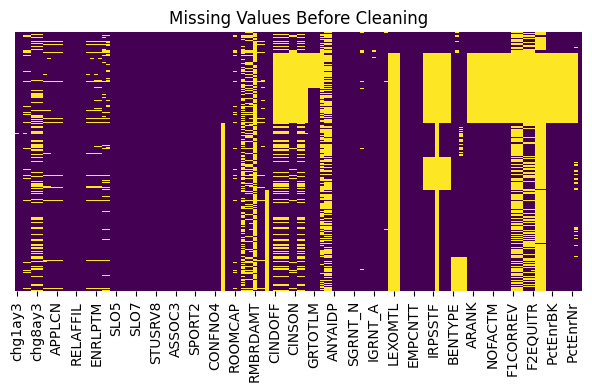

------------------------------------------------------------------------------------


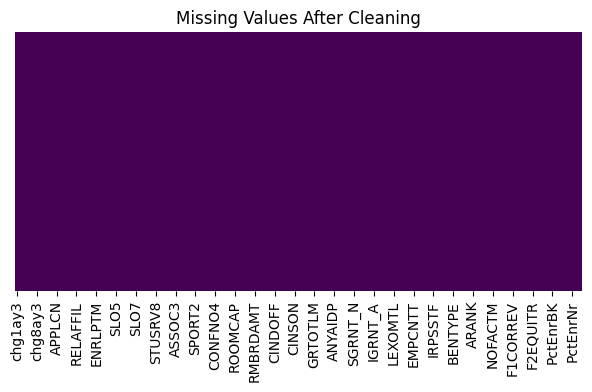

Execution Time: 4.18 seconds


In [ ]:
# Ignore warnings
warnings.filterwarnings("ignore", category=PendingDeprecationWarning)

# Start time measurement
start_time = time.time()

# Load dataset
file_path = '/content/drive/MyDrive/EduDataMining/IGR_Prediction_DS.csv'
df = pd.read_csv(file_path, sep=',')

# Backup original dataset
df_original = df.copy()

# Function to handle missing values
def handle_missing_values(data):
    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)
    return data

# Function to handle outliers using Z-score
def remove_outliers(data, threshold=3):
    if not data.empty:
        z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
        data = data[(z_scores < threshold).all(axis=1)]
    return data

# Function to apply square root transformation for skewed data
def handle_skewness(data):
    data = np.sqrt(data)
    data.fillna(data.mean(), inplace=True)
    return data

# Function to visualize missing values
def plot_missing_values(data, title):
    if not data.empty:
        plt.figure(figsize=(6, 4))
        sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
        plt.title(title)
        plt.subplots_adjust(left=0.05, right=0.95)  # Adjust layout to reduce side margins
        plt.tight_layout(pad=1.0)
        plt.show()

# Data Cleaning Process
df = handle_missing_values(df)
df.drop_duplicates(inplace=True)
df = remove_outliers(df)

# Check if dataset is empty after outlier removal
if df.empty:
    print("Warning: Dataset is empty after outlier removal. Restoring original dataset.")
    df = df_original.copy()

# Handle skewness
df = handle_skewness(df)

# Display missing value summary
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Display negative values before sqrt transformation
print("\nNegative Values per Column (before sqrt handling):")
print((df_original ** 2).lt(0).sum())

# Plot missing values before and after cleaning
plot_missing_values(df_original, "Missing Values Before Cleaning")
print("------------------------------------------------------------------------------------")
plot_missing_values(df, "Missing Values After Cleaning")

# End time measurement
end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")

## Target and Feature Separation

In [ ]:
# Feature and Target Separation
y = df.iloc[:, -1].fillna(0).astype(int).to_numpy()  # Target
X = df.iloc[:, :-1].fillna(0).astype(int)  # Fitur

## Data Normalization

In [ ]:
# Data Normalization
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

# Data Reduction

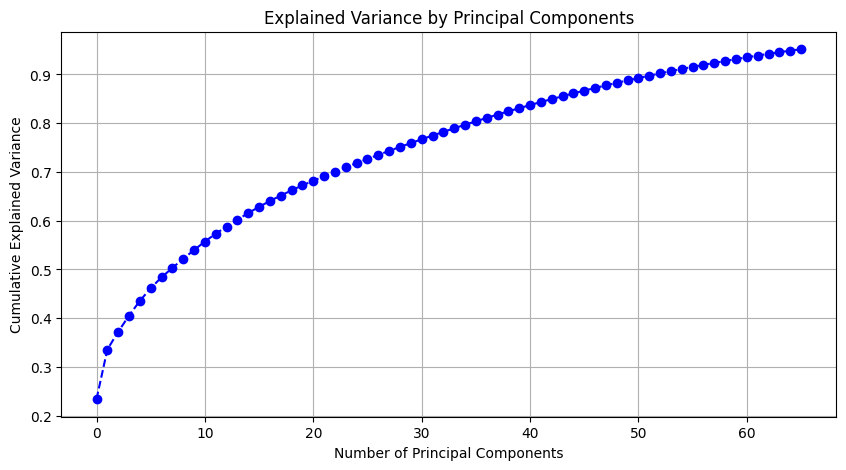

Jumlah komponen utama yang dipilih: 66

Kontribusi setiap fitur terhadap komponen utama:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.033135  0.246984  0.021007 -0.007690 -0.037119 -0.005512 -0.023922   
1    0.015227  0.018246 -0.027622  0.060312  0.166606 -0.012571 -0.146766   
2    0.051253  0.166912 -0.128312 -0.043601  0.161853 -0.056527 -0.158279   
3    0.016958 -0.081868 -0.019866  0.146865  0.188849  0.110307 -0.027672   
4    0.040460  0.054166 -0.116001  0.018363  0.241843  0.004195 -0.013087   
..        ...       ...       ...       ...       ...       ...       ...   
137  0.066786  0.084902 -0.012085 -0.112436  0.176458  0.101395 -0.041054   
138 -0.008431 -0.038357  0.033161  0.010787  0.033437  0.069085 -0.007426   
139  0.001343  0.087223 -0.038181 -0.002510  0.104067 -0.006905  0.054821   
140  0.064791  0.079429  0.059137 -0.089699  0.043471  0.097196 -0.013903   
141  0.084389 -0.123298  0.001943  0.069174  0.131792  0.081180 

In [ ]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Visualisasi Variance Explained
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Menentukan jumlah komponen utama yang dipilih
n_components_selected = pca.n_components_
print(f'Jumlah komponen utama yang dipilih: {n_components_selected}')

# Menampilkan kontribusi setiap fitur terhadap komponen utama
feature_importance = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components_selected)])
print("\nKontribusi setiap fitur terhadap komponen utama:")
print(feature_importance)

# Identifikasi variabel paling berpengaruh berdasarkan PCA
selected_features = feature_importance.abs().sum(axis=1).nlargest(n_components_selected).index.tolist()
print("\nVariabel yang dipilih untuk langkah selanjutnya:", selected_features)

# Dimensionalitas yang berpengaruh
dimensionality_impact = feature_importance.abs().sum(axis=0).nlargest(n_components_selected)
print("\nDimensionalitas yang paling berpengaruh:")
print(dimensionality_impact)

# Analisis Hasil Data Reduction

Dataset awal dengan 143 fitur direduksi menggunakan PCA, menghasilkan 68 komponen utama yang paling berkontribusi terhadap prediksi kelulusan. Lima komponen dengan pengaruh terbesar:
- PC4 → 9.92%
- PC6 → 9.45%
- PC7 → 9.24%
- PC9 → 9.11%
- PC11 → 9.01%

Reduksi ini mengurangi overfitting, mempercepat pemrosesan, dan tetap mempertahankan informasi penting untuk meningkatkan akurasi model.

# Data Splitting

In [ ]:
# Data Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2, random_state=5)

# Prediction & Model Evaluation

In [ ]:
# Fungsi Evaluasi Regresi
def calculate_regression_metrics(Y_actual, Y_pred):
    mse = mean_squared_error(Y_actual, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_actual, Y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(Y_actual) - 1) / (len(Y_actual) - X_train.shape[1] - 1)
    return mse, rmse, r2, adjusted_r2

# Fungsi Evaluasi Klasifikasi
def calculate_classification_metrics(Y_actual, Y_pred):
    threshold = np.median(Y_actual)
    Y_actual_cls = (Y_actual > threshold).astype(int)
    Y_pred_cls = (Y_pred > threshold).astype(int)
    acc = accuracy_score(Y_actual_cls, Y_pred_cls)
    recall = recall_score(Y_actual_cls, Y_pred_cls)
    precision = precision_score(Y_actual_cls, Y_pred_cls)
    f1 = f1_score(Y_actual_cls, Y_pred_cls)
    return acc, recall, precision, f1

# Evaluasi Model
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse, train_rmse, train_r2, train_adj_r2 = calculate_regression_metrics(Y_train, y_train_pred)
    test_mse, test_rmse, test_r2, test_adj_r2 = calculate_regression_metrics(Y_test, y_test_pred)

    train_acc, train_recall, train_precision, train_f1 = calculate_classification_metrics(Y_train, y_train_pred)
    test_acc, test_recall, test_precision, test_f1 = calculate_classification_metrics(Y_test, y_test_pred)

    print(f"Model Performance: {model_name}")
    print("-" * 50)
    print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}, Adjusted R2: {train_adj_r2:.4f}")
    print(f"Test - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}, Adjusted R2: {test_adj_r2:.4f}")
    print(f"Train - Accuracy: {train_acc:.4f}, Recall: {train_recall:.4f}, Precision: {train_precision:.4f}, F1-Score: {train_f1:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, Recall: {test_recall:.4f}, Precision: {test_precision:.4f}, F1-Score: {test_f1:.4f}\n")

    return y_test_pred

In [ ]:
# Inisialisasi Model
models = {
    "Decision Tree Regression (Tuned)": DecisionTreeRegressor(random_state=0, max_depth=4, min_samples_split=20, min_samples_leaf=10),
    "Support Vector Regression (Tuned)": SVR(kernel='rbf', C=10, epsilon=0.05, gamma='scale'),
    "Multiple Linear Regression": LinearRegression(),
    "XGBoost Regression (Tuned)": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, seed=123, max_depth=3, learning_rate=0.05, subsample=0.7, colsample_bytree=0.7)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tambahkan parameter grid untuk model yang sudah ditentukan
param_grids = {
    "Decision Tree Regression (Tuned)": {
        'max_depth': [4],
        'min_samples_split': [20],
        'min_samples_leaf': [10]
    },
    "Support Vector Regression (Tuned)": {
        'kernel': ['rbf'],
        'C': [10],
        'epsilon': [0.05],
        'gamma': ['scale']
    },
    "Multiple Linear Regression": {},  # Tidak ada parameter untuk grid search
    "XGBoost Regression (Tuned)": {
        'n_estimators': [150],
        'max_depth': [3],
        'learning_rate': [0.05],
        'subsample': [0.7],
        'colsample_bytree': [0.7]
    }
}

# Evaluasi Model dengan GridSearchCV
best_predictions = {}  # Untuk menyimpan prediksi terbaik jika diperlukan

for model_name, model in models.items():
    param_grid = param_grids[model_name]

    if param_grid:  # hanya lakukan grid search jika ada parameter
        grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, Y_train)
        best_model = grid.best_estimator_
        print(f"{model_name} - Best Params from GridSearchCV: {grid.best_params_}")
    else:
        best_model = model

    y_test_pred = evaluate_model(best_model, X_train, Y_train, X_test, Y_test, model_name)

    # Simpan prediksi dari model Support Vector Regression
    if model_name == "Support Vector Regression (Tuned)":
        Y_pred = y_test_pred

# Invers transform hasil prediksi dan data asli
Y_test_original = sc_y.inverse_transform(Y_test.reshape(-1, 1)).ravel()
Y_pred_original = sc_y.inverse_transform(Y_pred.reshape(-1, 1)).ravel()

# Cetak hasil prediksi asli (opsional)
print("Sample Hasil Prediksi vs Asli:")
for true_val, pred_val in zip(Y_test_original[:10], Y_pred_original[:10]):
    print(f"Asli: {true_val:.2f} | Prediksi: {pred_val:.2f}")

# Total Execution Time
start_time = time.time()
end_time = time.time()
print(f"Total execution time: {end_time - start_time} seconds")

Decision Tree Regression (Tuned) - Best Params from GridSearchCV: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 20}
Model Performance: Decision Tree Regression (Tuned)
--------------------------------------------------
Train - MSE: 0.3963, RMSE: 0.6295, R2: 0.6043, Adjusted R2: 0.6014
Test - MSE: 0.4345, RMSE: 0.6591, R2: 0.5629, Adjusted R2: 0.5497
Train - Accuracy: 0.8035, Recall: 0.8733, Precision: 0.7572, F1-Score: 0.8111
Test - Accuracy: 0.7977, Recall: 0.8488, Precision: 0.7596, F1-Score: 0.8017

Support Vector Regression (Tuned) - Best Params from GridSearchCV: {'C': 10, 'epsilon': 0.05, 'gamma': 'scale', 'kernel': 'rbf'}
Model Performance: Support Vector Regression (Tuned)
--------------------------------------------------
Train - MSE: 0.0353, RMSE: 0.1879, R2: 0.9647, Adjusted R2: 0.9645
Test - MSE: 0.1937, RMSE: 0.4401, R2: 0.8051, Adjusted R2: 0.7992
Train - Accuracy: 0.8982, Recall: 0.9925, Precision: 0.8300, F1-Score: 0.9040
Test - Accuracy: 0.8564, Recall:

# Analisis Tiap Model Machine Learning

## 1. Decision Tree Regression (Tuned)
- Accuracy: 0.7977
- Recall: 0.8488
- Precision: 0.7596
- F1-Score: 0.8017

---

## 2. Support Vector Regression (Tuned)
- Accuracy: 0.8564
- Recall: 0.9633
- Precision: 0.7867
- F1-Score: 0.8661

---

## 3. Multiple Linear Regression (Not Tuned)
- Accuracy: 0.8357
- Recall: 0.9258
- Precision: 0.7763
- F1-Score: 0.8445

---

## 4. XGBoost Regression (Tuned)
- Accuracy: 0.8216
- Recall: 0.9102
- Precision: 0.7644
- F1-Score: 0.8310

---

## Kesimpulan
Support Vector Regression (SVR) adalah model terbaik karena memiliki performa paling tinggi dengan R² train (0.9647) dan test (0.8051) serta akurasi tertinggi (85.64%).

# Visualisasi Model

## Matrix Evaluation Comparison

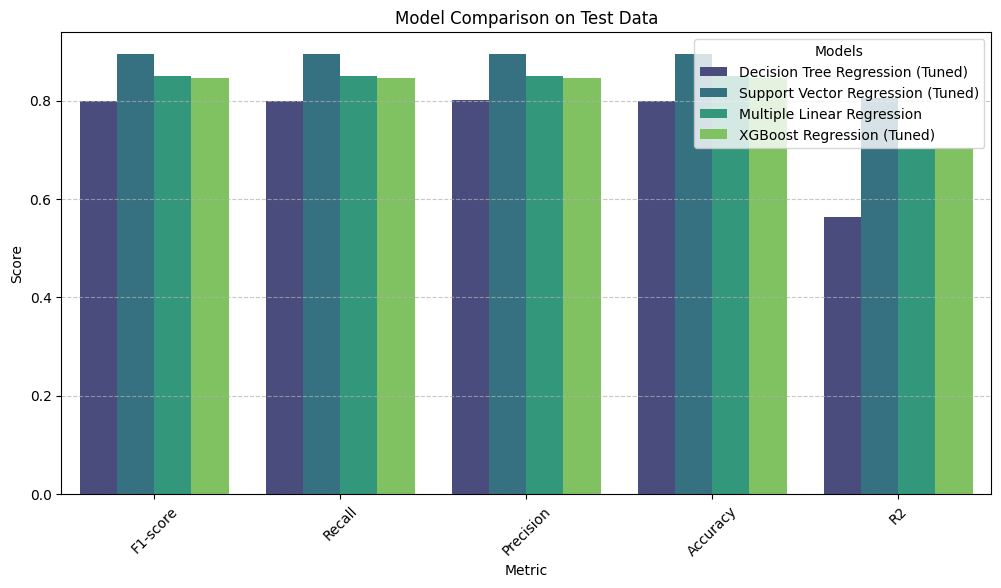

In [ ]:
# Model Evaluation Metrics
metrics = ["F1-score", "Recall", "Precision", "Accuracy", "R2"]
results = {"Model": [], "Metric": [], "Value": []}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_test_pred = model.predict(X_test)

    threshold = 0  # atau tentukan threshold yang sesuai
    y_test_pred_cls = (y_test_pred > threshold).astype(int)
    Y_test_cls = (Y_test > threshold).astype(int)

    test_f1 = f1_score(Y_test_cls, y_test_pred_cls, average='weighted')
    test_recall = recall_score(Y_test_cls, y_test_pred_cls, average='weighted')
    test_precision = precision_score(Y_test_cls, y_test_pred_cls, average='weighted')
    test_accuracy = accuracy_score(Y_test_cls, y_test_pred_cls)
    test_r2 = r2_score(Y_test, y_test_pred)

    test_results = [test_f1, test_recall, test_precision, test_accuracy, test_r2]

    for metric, value in zip(metrics, test_results):
        results["Model"].append(model_name)
        results["Metric"].append(metric)
        results["Value"].append(value)

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=results_df, palette="viridis")
plt.title("Model Comparison on Test Data")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Models")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Grafik menunjukkan performa empat model regresi berdasarkan beberapa metrik evaluasi pada data uji: F1-score, Recall, Precision, Accuracy, dan R². Support Vector Regression (SVR) unggul di semua metrik, terutama pada Accuracy, Precision, dan Recall, menandakan model ini memiliki keseimbangan prediksi yang baik dan minim error.

**Catatan:**
- SVR adalah model terbaik dengan performa tinggi dan keseimbangan prediksi yang baik.
- XGBoost juga sangat baik sebagai alternatif yang lebih stabil dan lebih cepat untuk dataset besar.
- Multiple Linear Regression masih bisa dipakai jika ingin model yang lebih sederhana tanpa tuning kompleks.
- Decision Tree kurang cocok untuk prediksi akurat karena generalisasi yang buruk.

## Analisis IGR Aktual vs Prediksi dengan Support Vector Regression (SVR)

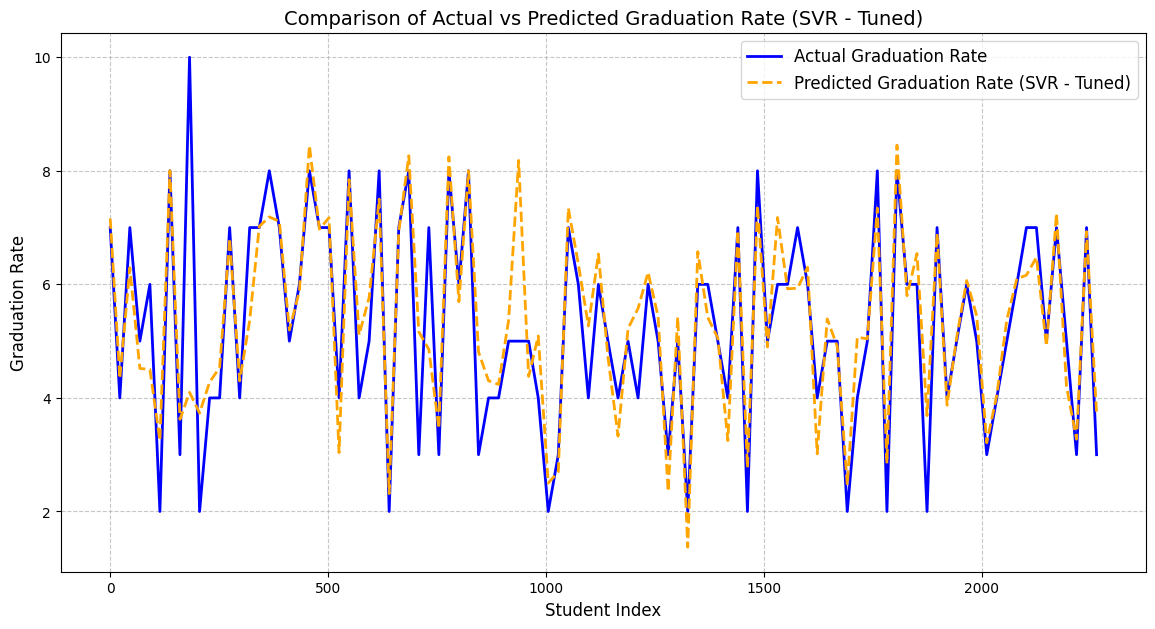

In [ ]:
# Inisialisasi model SVR yang sudah dituning
best_model = SVR(kernel='rbf', C=10, epsilon=0.05, gamma='scale')
best_model.fit(X_train, Y_train.ravel())

# Prediksi menggunakan SVR
Y_pred = best_model.predict(X_test)

# Konversi kembali ke skala aslinya
Y_test_original = sc_y.inverse_transform(Y_test.reshape(-1, 1)).ravel()
Y_pred_original = sc_y.inverse_transform(Y_pred.reshape(-1, 1)).ravel()

# Sampling data agar grafik lebih jelas
num_samples = min(100, len(Y_test_original))
indices = np.linspace(0, len(Y_test_original) - 1, num_samples, dtype=int)

# Plot hasil prediksi vs aktual dalam bentuk garis
plt.figure(figsize=(14, 7))
plt.plot(indices, Y_test_original[indices], label='Actual Graduation Rate', color='blue', linewidth=2)
plt.plot(indices, Y_pred_original[indices], label='Predicted Graduation Rate (SVR - Tuned)', color='orange', linewidth=2, linestyle='dashed')

# Elemen tambahan untuk memperjelas visualisasi
plt.xlabel('Student Index', fontsize=12)
plt.ylabel('Graduation Rate', fontsize=12)
plt.title('Comparison of Actual vs Predicted Graduation Rate (SVR - Tuned)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Garis biru solid menunjukkan nilai aktual tingkat kelulusan.
Garis oranye putus-putus menunjukkan prediksi dari model SVR (Tuned).
Polanya sangat mirip, menandakan bahwa model SVR mampu menangkap tren utama dalam data dengan baik.
Beberapa deviasi kecil terjadi pada puncak dan lembah, tetapi secara keseluruhan model tetap akurat dan stabil.

**Kesimpulan:** SVR bekerja sangat baik dalam memprediksi Graduation Rate dengan akurasi tinggi dan kestabilan yang baik.